In [2]:
# Standard Library
import os
import csv
import datetime

# Data Processing and Analysis
import pandas as pd
import numpy as np

# Image Processing
import cv2
from PIL import Image
import pydicom
from skimage import exposure, filters, morphology

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Deep Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight

# TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import (Dense, GlobalAveragePooling2D, Dropout,
                                    Conv2D, MaxPooling2D, Flatten, Input, BatchNormalization)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121, EfficientNetB1, EfficientNetB4, EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.callbacks import (ModelCheckpoint, EarlyStopping,
                                       ReduceLROnPlateau, TensorBoard)
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.regularizers import l2
from keras.metrics import Metric
from keras.saving import register_keras_serializable

# XML Processing
import xml.etree.ElementTree as ET

# Progress Bar
from tqdm import tqdm

In [3]:
# Chemin de base vers tes fichiers CSV
base_path = r'C:\work( sous disque C)\4eme Esprit\S2\pi\PulmoScanProjectPi\PulmoScan\Data\classification'

# Charger les fichiers CSV
annotations_combine = pd.read_csv(os.path.join(base_path, 'annotations_combine.csv'))
classification_nodules = pd.read_csv(os.path.join(base_path, 'classification_nodules.csv'))
classification_nodules_retouches = pd.read_csv(os.path.join(base_path, 'classification_nodules_retouches.csv'))
df_classification = pd.read_csv(os.path.join(base_path, 'df_classification.csv'))
df_filtered = pd.read_csv(os.path.join(base_path, 'df_filtred.csv'))


C:\Users\hp\AppData\Local\Temp\ipykernel_4892\2687760158.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  annotations_combine = pd.read_csv(os.path.join(base_path, 'annotations_combine.csv'))


In [97]:
'''

# Chemin du dossier contenant les fichiers XML
chemin_dossier_xml = r'C:\Users\lenovo\pulmoscan\pulmo\PulmoScan\Data\tcia-lidc-xml\189'

# Nom du fichier CSV de sortie
fichier_csv = 'annotations5.csv'

# Namespace
namespace = {'ns': 'http://www.nih.gov'}

# Variable pour stocker les en-têtes
en_tetes = None

# Ouvrir le fichier CSV en mode écriture
with open(fichier_csv, mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    
    # Parcourir chaque fichier dans le dossier
    for fichier in os.listdir(chemin_dossier_xml):
        if fichier.endswith('.xml'):
            chemin_fichier = os.path.join(chemin_dossier_xml, fichier)
            
            # Parser le fichier XML
            tree = ET.parse(chemin_fichier)
            root = tree.getroot()
            
            # Si les en-têtes n'ont pas encore été définis, les extraire du premier fichier XML
            if en_tetes is None:
                en_tetes = [
                    'annotationVersion', 'servicingRadiologistID',
                    'noduleID', 'imageZposition', 'imageSOP_UID', 'inclusion',
                    'subtlety', 'internalStructure', 'calcification', 'sphericity',
                    'margin', 'lobulation', 'spiculation', 'texture', 'malignancy',
                    'edgeMap_xCoord', 'edgeMap_yCoord'
                ]
                writer.writerow(en_tetes)
            
            # Extraire les données nécessaires
            for reading_session in root.findall('ns:readingSession', namespace):
                annotation_version = reading_session.find('ns:annotationVersion', namespace).text
                servicing_radiologist_id = reading_session.find('ns:servicingRadiologistID', namespace).text
                
                for nodule in reading_session.findall('ns:unblindedReadNodule', namespace):
                    nodule_id = nodule.find('ns:noduleID', namespace).text
                    
                    # Extraire les caractéristiques du nodule
                    characteristics = nodule.find('ns:characteristics', namespace)
                    if characteristics is not None:
                        subtlety = characteristics.find('ns:subtlety', namespace).text
                        internal_structure = characteristics.find('ns:internalStructure', namespace).text
                        calcification = characteristics.find('ns:calcification', namespace).text
                        sphericity = characteristics.find('ns:sphericity', namespace).text
                        margin = characteristics.find('ns:margin', namespace).text
                        lobulation = characteristics.find('ns:lobulation', namespace).text
                        spiculation = characteristics.find('ns:spiculation', namespace).text
                        texture = characteristics.find('ns:texture', namespace).text
                        malignancy = characteristics.find('ns:malignancy', namespace).text
                    else:
                        subtlety = internal_structure = calcification = sphericity = margin = lobulation = spiculation = texture = malignancy = ''
                    
                    # Extraire les informations du ROI
                    for roi in nodule.findall('ns:roi', namespace):
                        image_zposition = roi.find('ns:imageZposition', namespace).text
                        image_sop_uid = roi.find('ns:imageSOP_UID', namespace).text
                        inclusion = roi.find('ns:inclusion', namespace).text
                        
                        # Extraire les coordonnées edgeMap
                        for edge_map in roi.findall('ns:edgeMap', namespace):
                            x_coord = edge_map.find('ns:xCoord', namespace).text
                            y_coord = edge_map.find('ns:yCoord', namespace).text
                            
                            # Écrire une ligne dans le CSV
                            ligne = [
                                annotation_version, servicing_radiologist_id,
                                nodule_id, image_zposition, image_sop_uid, inclusion,
                                subtlety, internal_structure, calcification, sphericity,
                                margin, lobulation, spiculation, texture, malignancy,
                                x_coord, y_coord
                            ]
                            writer.writerow(ligne)

print(f"Les données ont été écrites dans {fichier_csv}")

'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 74-75: truncated \UXXXXXXXX escape (1607791945.py, line 85)

In [ ]:
"""

# Liste des fichiers à combiner
fichiers = ['annotations.csv','annotations1.csv' ,'annotations2.csv', 'annotations3.csv', 'annotations4.csv', 'annotations5.csv']

# Lire et combiner les fichiers
dataframes = [pd.read_csv(fichier) for fichier in fichiers]
df_combine = pd.concat(dataframes, ignore_index=True)

# Sauvegarder le fichier combiné
df_combine.to_csv('annotations_combine.csv', index=False)

"""

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20256\263403447.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(fichier) for fichier in fichiers]


In [11]:
## data = pd.read_csv('annotations_combine.csv')
data = annotations_combine

In [ ]:
"""

def basic_statistics(data):
    print("Infos:\n", data.info())
    print("Description:\n", data.describe())
    print("Presence of null values:\n")
    print(data.isnull().sum())

"""

In [ ]:
"""

if __name__ == "__main__":
   
    basic_statistics(data)
    
    print("Data:\n", data.head())

"""

'\n\nif __name__ == "__main__":\n   \n    basic_statistics(data)\n    \n    print("Data:\n", data.head())\n\n'

In [ ]:
## data.head(5)

In [ ]:
"""

columns_to_drop = ["servicingRadiologistID", "annotationVersion"]
df_filtred = data.drop(columns=columns_to_drop, errors='ignore')  # Ignore si la colonne n'existe pas

# Sauvegarde du fichier nettoyé
cleaned_file_path = "df_filtred.csv"
df_filtred .to_csv(cleaned_file_path, index=False)

print(f"Fichier nettoyé enregistré sous : {cleaned_file_path}")

"""

'\n\ncolumns_to_drop = ["servicingRadiologistID", "annotationVersion"]\ndf_filtred = data.drop(columns=columns_to_drop, errors=\'ignore\')  # Ignore si la colonne n\'existe pas\n\n# Sauvegarde du fichier nettoyé\ncleaned_file_path = "df_filtred.csv"\ndf_filtred .to_csv(cleaned_file_path, index=False)\n\nprint(f"Fichier nettoyé enregistré sous : {cleaned_file_path}")\n\n'

In [4]:
# Fonction pour visualiser la distribution des nodules concereuses et non concereuses
def plot_distribution(data, column):
    """Affiche un histogramme de la colonne spécifiée"""
    if column in data.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[column].dropna(), bins=30, kde=True)
        plt.xlabel(column)
        plt.ylabel("Nombre d'observations")
        plt.title(f"Distribution de {column}")
        plt.show()
    else:
        print(f"⚠️ La colonne '{column}' n'existe pas dans les données.")

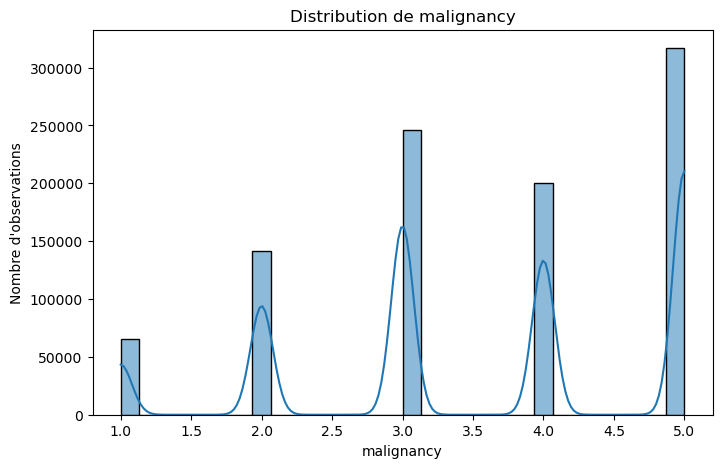

In [5]:
if __name__ == "__main__":
    plot_distribution(df_filtered, "malignancy")
    

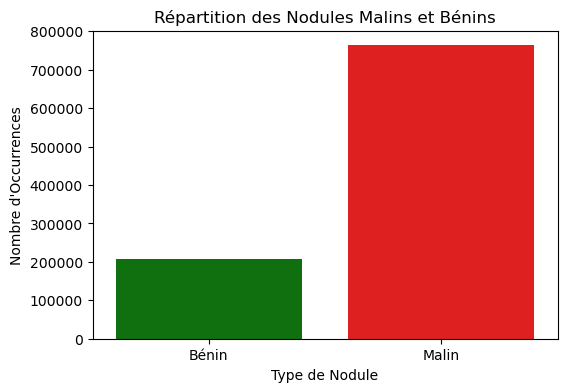

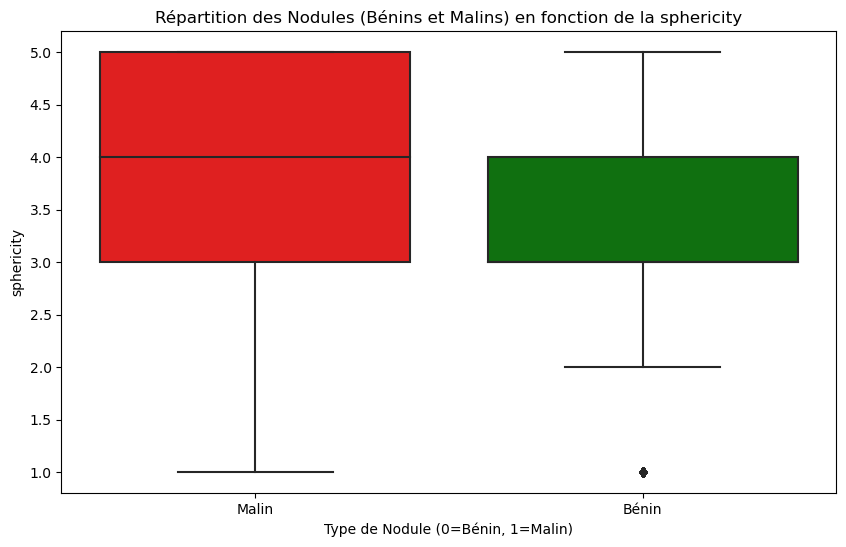

In [6]:
malignancy_col = "malignancy"


if malignancy_col in df_filtered.columns:
    
    
    
    # Création de la colonne 'label' avec gestion des NaN
    def classify_malignancy(value):
        if pd.isna(value):  # Si NaN, ne pas classifier
            return None
        return 0 if value in [1, 2] else 1  # 0 = Bénin, 1 = Malin

    df_filtered["label"] = df_filtered[malignancy_col].apply(classify_malignancy)

    # Exclure les valeurs None pour les visualisations
    df_classification = df_filtered.dropna(subset=["label"]).copy()
    df_classification["label"] = df_classification["label"].astype(int)  # Convertir en entier après suppression des NaN

    
    
    # 1️⃣ Histogramme de la répartition des nodules
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df_classification["label"], palette=["green", "red"])
    plt.xticks(ticks=[0, 1], labels=["Bénin", "Malin"])
    plt.xlabel("Type de Nodule")
    plt.ylabel("Nombre d'Occurrences")
    plt.title("Répartition des Nodules Malins et Bénins")
    plt.show()

    # Boxplot de la distribution des nodules bénins et malins en fonction de 'internal_structure'
    plt.figure(figsize=(10, 6))

    sns.boxplot(x="label", y="sphericity", data=df_classification, palette=[ "red","green"])

    plt.xlabel("Type de Nodule (0=Bénin, 1=Malin)")
    plt.ylabel("sphericity")
    plt.title("Répartition des Nodules (Bénins et Malins) en fonction de la sphericity")
    plt.xticks([0, 1], ["Malin","Bénin"])  # Pour remplacer les valeurs 0 et 1 par 'Bénin' et 'Malin'
    plt.show()
else:
    print("⚠️ La colonne 'malignancy' est absente du dataset.")

In [7]:
df_classification.head(5)

,noduleID,imageZposition,imageSOP_UID,inclusion,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,malignancy,edgeMap_xCoord,edgeMap_yCoord,label
1,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,364,172,1
2,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,364,171,1
3,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,364,170,1
4,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,365,169,1
5,3,1550.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.498089111228...,True,5.0,1.0,6.0,3.0,4.0,1.0,1.0,5.0,3.0,365,168,1


In [8]:
"""

# Sauvegarde du fichier nettoyé
file_path = "df_classification.csv"
df_classification .to_csv(file_path, index=False)

print(f"Fichier  enregistré sous : {file_path}")

"""


'\n\n# Sauvegarde du fichier nettoyé\nfile_path = "df_classification.csv"\ndf_classification .to_csv(file_path, index=False)\n\nprint(f"Fichier  enregistré sous : {file_path}")\n\n'

In [9]:
# 2. Séparer les malins (label 1) et bénins (label 0)
malins = df_classification[df_classification['label'] == 1] 
benins = df_classification[df_classification['label'] == 0] 

# 3. Choisir la taille de l'échantillon malins (ex: même nombre que les benins)
#n_echantillon_benin = len(malins)  # Option 1: même quantité
pourcentage = 0.4  # 40% des malins
malins_echantillon = malins.sample(frac=pourcentage, random_state=42)

# 5. Combiner les données
df_final_retouches = pd.concat([benins, malins_echantillon])

# 6. Mélanger les lignes
df_final_retouches = df_final_retouches.sample(frac=1, random_state=42).reset_index(drop=True)

# 7. Sauvegarder le nouveau CSV
df_final_retouches.to_csv('classification_nodules_retouches.csv', index=False)

print(f"Dataset final créé avec:")
print(f"- {len(benins)} nodules benins (100%)")
print(f"- {len(malins_echantillon)} nodules malins (échantillon)")
print(f"Total: {len(df_final_retouches)} lignes")

Dataset final créé avec:
- 206714 nodules benins (100%)
- 305251 nodules malins (échantillon)
Total: 511965 lignes


**Data Processing**

In [10]:
# Fonction pour normaliser l'image
def normalize_image(image):
    """Normalise l'image pour améliorer le contraste."""
    return exposure.rescale_intensity(image, in_range='image', out_range=(0, 255))


In [11]:
# Fonction pour extraire les poumons
def extract_lungs(image):
    """Extrait les poumons en utilisant un seuillage et des opérations morphologiques."""
    # Appliquer un seuillage pour isoler les poumons
    threshold = filters.threshold_otsu(image)
    binary_image = image > threshold

    # Supprimer les petits objets (artefacts)
    cleaned_image = morphology.remove_small_objects(binary_image, min_size=500)

    # Remplir les trous dans les poumons
    filled_image = morphology.binary_closing(cleaned_image, morphology.disk(5))

    # Appliquer le masque à l'image originale
    lungs_image = np.where(filled_image, image, 0)
    return lungs_image


In [12]:
def find_all_dicom_files(root_dir):
    """Trouve tous les fichiers DICOM dans l'arborescence"""
    dicom_files = []
    
    for root, dirs, files in tqdm(os.walk(root_dir), desc="Scanning DICOM files"):
        for file in files:
            if file.endswith('.dcm') or file.endswith('.DCM'):
                full_path = os.path.join(root, file)
                dicom_files.append(full_path)
    
    return dicom_files

In [13]:
def load_and_display_lungs(dicom_files):
    """Charge et affiche les images DICOM à partir d'une liste de chemins"""
    for dicom_path in tqdm(dicom_files, desc="Processing DICOM files"):
        try:
            # Charger le fichier DICOM
            dicom_image = pydicom.dcmread(dicom_path)
            image_data = dicom_image.pixel_array

            # Normaliser l'image
            normalized_image = normalize_image(image_data)

            # Extraire les poumons
            lungs_image = extract_lungs(normalized_image)

            # Afficher l'image originale et les poumons extraits
            plt.figure(figsize=(12, 6))

            # Image originale
            plt.subplot(1, 2, 1)
            plt.imshow(image_data, cmap=plt.cm.bone)
            plt.title(f"Image originale : {os.path.basename(dicom_path)}")
            plt.axis('off')

            # Poumons extraits
            plt.subplot(1, 2, 2)
            plt.imshow(lungs_image, cmap=plt.cm.bone)
            plt.title(f"Poumons extraits : {os.path.basename(dicom_path)}")
            plt.axis('off')

            plt.show()
            
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier {dicom_path}: {e}")
            continue


Scanning DICOM files: 3627it [00:02, 1579.01it/s]


Nombre total de fichiers DICOM trouvés: 244527


Processing DICOM files:   0%|          | 0/5 [00:00<?, ?it/s]

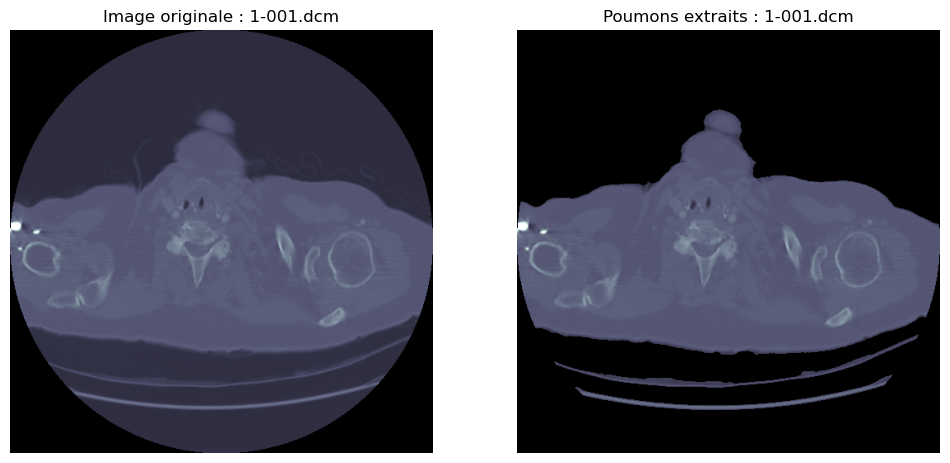

Processing DICOM files:  20%|██        | 1/5 [00:00<00:01,  2.06it/s]

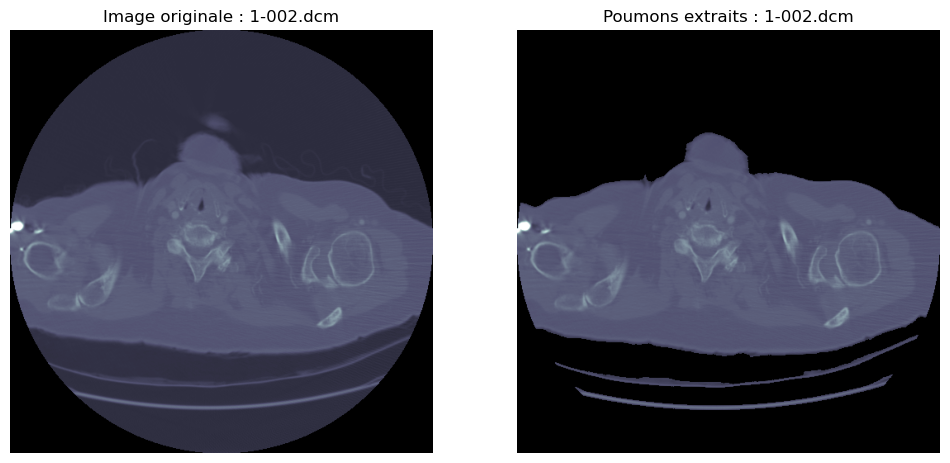

Processing DICOM files:  40%|████      | 2/5 [00:00<00:01,  2.34it/s]

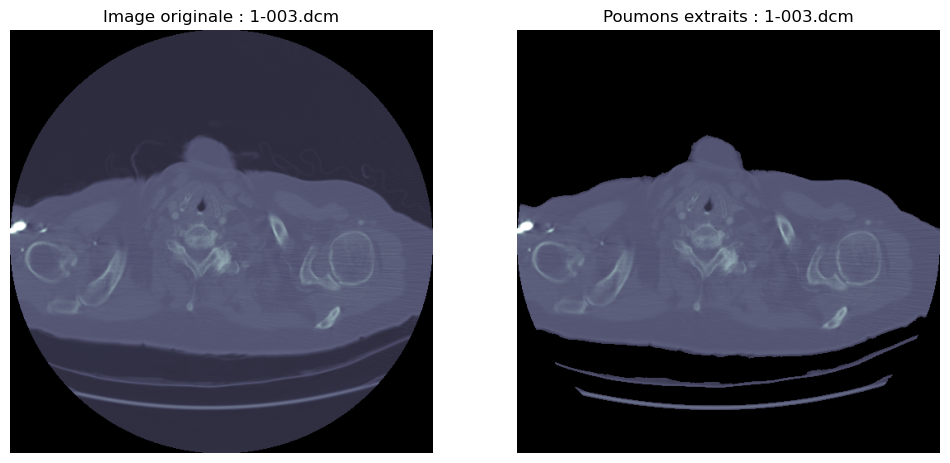

Processing DICOM files:  60%|██████    | 3/5 [00:01<00:00,  2.56it/s]

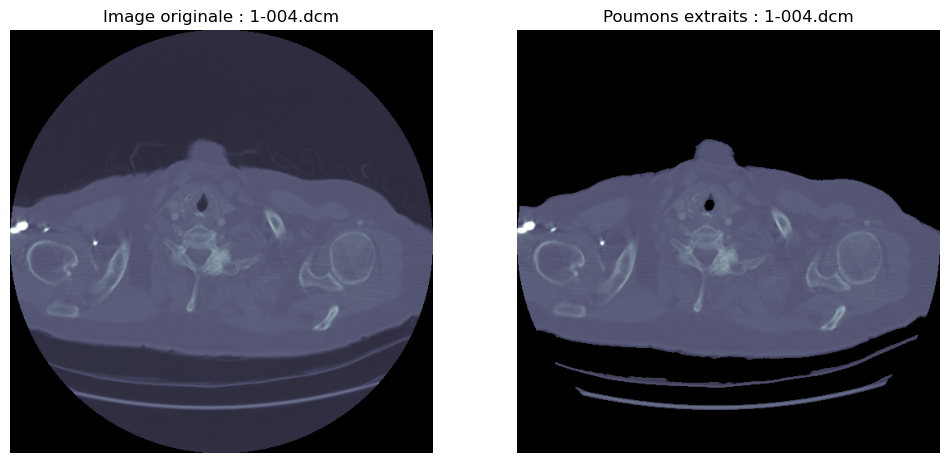

Processing DICOM files:  80%|████████  | 4/5 [00:01<00:00,  2.68it/s]

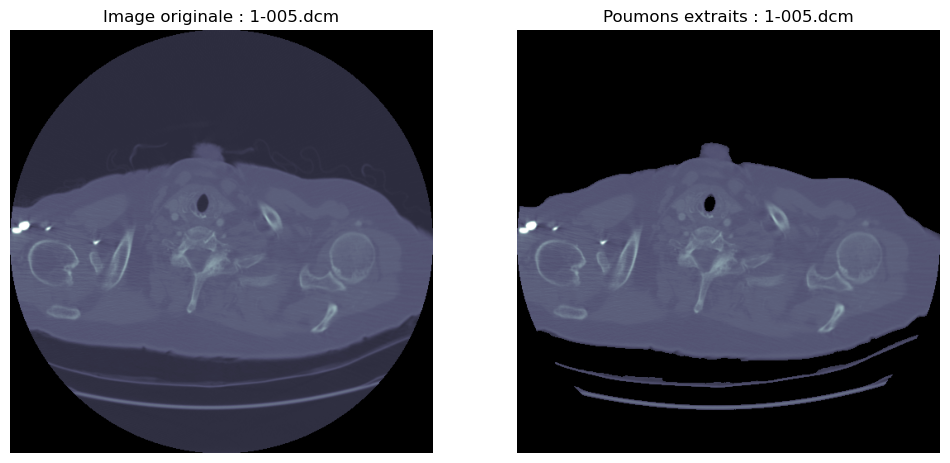

Processing DICOM files: 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]


In [14]:
# Utilisation
## dicom_root = r'C:\Users\lenovo\pulmoscan\pulmo\PulmoScan\Data\manifest-1600709154662\LIDC-IDRI'
dicom_root = r'C:\work( sous disque C)\4eme Esprit\S2\pi\PulmoScanProjectPi\PulmoScan\Data\Data\manifest-1600709154662\LIDC-IDRI'
dicom_files = find_all_dicom_files(dicom_root)

print(f"Nombre total de fichiers DICOM trouvés: {len(dicom_files)}")

# Afficher seulement les 5 premiers fichiers pour le test
load_and_display_lungs(dicom_files[:5])

In [15]:
# Chemin de base vers le fichier metadata
base_path = r'C:\work( sous disque C)\4eme Esprit\S2\pi\PulmoScanProjectPi\PulmoScan\Data\Data\manifest-1600709154662'

# Charger les fichiers CSV
df_metadata = pd.read_csv(os.path.join(base_path, 'metadata.csv'))
df_metadata.head(5)

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900213760403901722902,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.116951808801...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,DX,Digital X-Ray Image Storage - For Presentation,1.2.840.10008.5.1.4.1.1.1.1,1,6,91 MB,.\LIDC-IDRI\LIDC-IDRI-0002\01-01-2000-NA-NA-26...,2025-03-24T18:27:42.239
1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,DX,Digital X-Ray Image Storage - For Presentation,1.2.840.10008.5.1.4.1.1.1.1,2,16,36 MB,.\LIDC-IDRI\LIDC-IDRI-0001\01-01-2000-NA-NA-35...,2025-03-24T18:28:34.4
1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,133,70,33 MB,.\LIDC-IDRI\LIDC-IDRI-0001\01-01-2000-NA-NA-30...,2025-03-24T18:31:21.572
1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615202213033480003264,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.101370605276...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,140,74,11 MB,.\LIDC-IDRI\LIDC-IDRI-0003\01-01-2000-NA-NA-94...,2025-03-24T18:33:26.057
1.3.6.1.4.1.14519.5.2.1.6279.6001.142026812390984321013050559882,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.202063331127...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,DX,Digital X-Ray Image Storage - For Presentation,1.2.840.10008.5.1.4.1.1.1.1,5,38,59 MB,.\LIDC-IDRI\LIDC-IDRI-0003\01-01-2000-NA-NA-59...,2025-03-24T18:33:29.313


**Extraction des images**

**Configuration**

In [ ]:
"""
classifcation_base_path_retouches = r'C:\work( sous disque C)\4eme Esprit\S2\pi\PulmoScanProjectPi\PulmoScan\cancer-classification'

classifcation_base_path = r'C:\work( sous disque C)\4eme Esprit\S2\pi\PulmoScanProjectPi\PulmoScan\Data\classification'
base_path = r'C:\work( sous disque C)\4eme Esprit\S2\pi\PulmoScanProjectPi\PulmoScan\Data\Data\manifest-1600709154662'
dicom_root = os.path.join(base_path, 'LIDC-IDRI')
output_images_dir = os.path.join(base_path, 'extracted_images_retouches')
os.makedirs(output_images_dir, exist_ok=True)

"""


**Chargement des données**

In [ ]:
"""
df_nodule = pd.read_csv(os.path.join(classifcation_base_path_retouches, 'classification_nodules_retouches.csv'))
df_nodule['imageSOP_UID'] = df_nodule['imageSOP_UID'].astype(str)
sop_uids_set = set(df_nodule['imageSOP_UID'])

"""


**Fonction de verification UID**

In [ ]:
"""
def verify_uid_matching():
    #Vérifie la correspondance entre les UID DICOM et ceux du CSV
    sample_dcm = None
    # Trouver un fichier DICOM valide
    for root, _, files in os.walk(dicom_root):
        for file in files:
            if file.lower().endswith('.dcm'):
                sample_dcm = os.path.join(root, file)
                break
        if sample_dcm:
            break
    
    if sample_dcm:
        ds = pydicom.dcmread(sample_dcm)
        print("\n🔍 Comparaison des UID:")
        print(f"Exemple d'UID dans un DICOM: {ds.SOPInstanceUID}")
        print(f"Exemple d'UID dans classification_nodules_retouches.csv: {next(iter(sop_uids_set))}")
    else:
        print("Aucun fichier DICOM trouvé pour la comparaison")

verify_uid_matching()

"""



🔍 Comparaison des UID:
Exemple d'UID dans un DICOM: 1.3.6.1.4.1.14519.5.2.1.6279.6001.262721256650280657946440242654
Exemple d'UID dans classification_nodules_retouches.csv: 1.3.6.1.4.1.14519.5.2.1.6279.6001.979662920582925091204347091558


**Solution**

In [ ]:
"""

# 1. Trouver tous les fichiers DICOM
dcm_files = []
for root, _, files in os.walk(dicom_root):
    for file in files:
        if file.lower().endswith('.dcm'):
            dcm_files.append(os.path.join(root, file))

# 2. Traiter chaque fichier
image_paths = []
labels = []
uid_mismatch_count = 0

for dcm_file in tqdm(dcm_files, desc="Traitement DICOM"):
    try:
        ds = pydicom.dcmread(dcm_file)
        sop_uid = getattr(ds, 'SOPInstanceUID', '')
        
        if sop_uid in sop_uids_set:
            # Conversion de l'image
            img_array = ds.pixel_array
            img_norm = ((img_array - img_array.min()) / (img_array.max() - img_array.min()) * 255).astype(np.uint8)
            img = Image.fromarray(img_norm)
            
            # Sauvegarde
            save_path = os.path.join(output_images_dir, f"{sop_uid}.png")
            img.save(save_path)
            
            image_paths.append(save_path)
            labels.append(df_nodule[df_nodule['imageSOP_UID'] == sop_uid]['label'].values[0])
        else:
            uid_mismatch_count += 1
            
    except Exception as e:
        continue

"""


Traitement DICOM:   9%|▉         | 21998/244527 [06:34<51:01, 72.68it/s]  C:\Users\hp\AppData\Local\Temp\ipykernel_17344\2058770929.py:23: RuntimeWarning: overflow encountered in scalar subtract
  img_norm = ((img_array - img_array.min()) / (img_array.max() - img_array.min()) * 255).astype(np.uint8)
Traitement DICOM: 100%|██████████| 244527/244527 [56:49<00:00, 71.72it/s]  


**Resultat**

In [24]:
"""


if image_paths:
    df_images = pd.DataFrame({'filename': image_paths, 'label': labels})
    df_images['label'] = df_images['label'].map({0: 'benin', 1: 'malin'})
    
    print(f"\n✅ {len(image_paths)} images converties avec succès!")
    print(f"⚠️ {uid_mismatch_count} fichiers avec UID non correspondants")
    print("Répartition des classes:")
    print(df_images['label'].value_counts())
    
    # Sauvegarde des résultats
    df_images.to_csv(os.path.join(base_path, 'image_labels_retouches.csv'), index=False)
    print(f"\n📁 Résultats sauvegardés dans {os.path.join(base_path, 'image_labels_retouches.csv')}")
else:
    print("\n❌ Aucune correspondance trouvée. Problèmes possibles:")
    print("1. Les UID dans classification_nodules_retouches.csv ne correspondent pas aux fichiers DICOM")
    print("2. Le fichier classification_nodules_retouches.csv peut être associé à un autre jeu de données")
    print("3. Les fichiers DICOM attendus ne sont pas dans le dossier spécifié")

    # Afficher des exemples pour comparaison
    if dcm_files:
        ds = pydicom.dcmread(dcm_files[0])
        print(f"\nExemple d'UID DICOM: {ds.SOPInstanceUID}")
        print(f"Exemple d'UID attendu: {next(iter(sop_uids_set))}")
"""



'\n\n\nif image_paths:\n    df_images = pd.DataFrame({\'filename\': image_paths, \'label\': labels})\n    df_images[\'label\'] = df_images[\'label\'].map({0: \'benin\', 1: \'malin\'})\n    \n    print(f"\n✅ {len(image_paths)} images converties avec succès!")\n    print(f"⚠️ {uid_mismatch_count} fichiers avec UID non correspondants")\n    print("Répartition des classes:")\n    print(df_images[\'label\'].value_counts())\n    \n    # Sauvegarde des résultats\n    df_images.to_csv(os.path.join(base_path, \'image_labels_retouches.csv\'), index=False)\n    print(f"\n📁 Résultats sauvegardés dans {os.path.join(base_path, \'image_labels_retouches.csv\')}")\nelse:\n    print("\n❌ Aucune correspondance trouvée. Problèmes possibles:")\n    print("1. Les UID dans classification_nodules_retouches.csv ne correspondent pas aux fichiers DICOM")\n    print("2. Le fichier classification_nodules_retouches.csv peut être associé à un autre jeu de données")\n    print("3. Les fichiers DICOM attendus ne sont 

**Data augmentation**

In [16]:
# Chemin vers le fichier CSV sauvegardé durant la phase de conversion
base_path = r'C:\work( sous disque C)\4eme Esprit\S2\pi\PulmoScanProjectPi\PulmoScan\Data\Data\manifest-1600709154662'
csv_path = os.path.join(base_path, 'image_labels_retouches.csv')

# Charger le DataFrame
df_images = pd.read_csv(csv_path)

# Afficher un aperçu
print("Aperçu du DataFrame:")
print(df_images.head())

# Créer l'objet ImageDataGenerator avec validation_split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% des données pour la validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Générateur pour l'entraînement
train_gen = datagen.flow_from_dataframe(
    dataframe=df_images,
    x_col='filename',       # colonne contenant les chemins d'images
    y_col='label',          # colonne contenant les labels
    target_size=(224, 224), # ajustez la taille selon vos besoins
    batch_size=32,
    class_mode='binary',
    subset='training',
    directory=None ,         # les chemins dans 'filename' sont absolus
    shuffle=True ,    
    seed=42                 # pour la reproductibilité

)

# Générateur pour la validation
val_gen = datagen.flow_from_dataframe(
    dataframe=df_images,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    directory=None,
    shuffle=True    
)

# Afficher le nombre d'images dans chaque générateur
print(f"Nombre d'images d'entraînement : {train_gen.samples}")
print(f"Nombre d'images de validation   : {val_gen.samples}")

Aperçu du DataFrame:
                                            filename  label
0  C:\work( sous disque C)\4eme Esprit\S2\pi\Pulm...  malin
1  C:\work( sous disque C)\4eme Esprit\S2\pi\Pulm...  malin
2  C:\work( sous disque C)\4eme Esprit\S2\pi\Pulm...  malin
3  C:\work( sous disque C)\4eme Esprit\S2\pi\Pulm...  malin
4  C:\work( sous disque C)\4eme Esprit\S2\pi\Pulm...  malin
Found 6092 validated image filenames belonging to 2 classes.
Found 1523 validated image filenames belonging to 2 classes.
Nombre d'images d'entraînement : 6092
Nombre d'images de validation   : 1523


**Modelisation**

**DenseNet121**

**Preparation du modele**

In [ ]:

"""

# Charger DenseNet121 sans la dernière couche (include_top=False)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Geler les couches de base (optionnel pour le fine-tuning)
for layer in base_model.layers[-30:]:   # Geler les 30 dernières couches (entraîner toutes les couches sauf les 30 dernières)
    layer.trainable = False

# Ajouter des couches pour classification binaire
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=predictions)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='AUC'),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

"""



**Création du dossier de sauvegarde**

In [ ]:
"""

checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

"""


**Callbacks pour sécuriser et améliorer l'entraînement**

In [ ]:
"""


checkpoint = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'model_epoch{epoch:02d}_valacc{val_accuracy:.2f}.h5'),
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
# Réduire le taux d'apprentissage(learning rate) si la validation ne s'améliore pas
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # réduit le lr de 80%
    patience=3, # si ça stagne pendant 3 epochs, on agit.
    verbose=1,
    min_lr=1e-6 # valeur minimale du learning rate (évite de tomber trop bas.)
)

"""


**Entrainement du modele**

In [ ]:
"""


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    verbose=1,
    callbacks=[checkpoint, early_stop, reduce_lr]

)

# Save final model
model.save('Dense_Net_model.keras')
print("\nModel saved as 'final_model.keras'")

"""


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - AUC: 0.5623 - accuracy: 0.5428 - loss: 0.8394 - precision: 0.6331 - recall: 0.5313
Epoch 1: val_accuracy improved from -inf to 0.62180, saving model to checkpoints\model_epoch01_valacc0.62.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 1854s 9s/step - AUC: 0.5624 - accuracy: 0.5429 - loss: 0.8392 - precision: 0.6332 - recall: 0.5314 - val_AUC: 0.5427 - val_accuracy: 0.6218 - val_loss: 1.0118 - val_precision: 0.6268 - val_recall: 0.9822 - learning_rate: 1.0000e-04
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - AUC: 0.6320 - accuracy: 0.5907 - loss: 0.7306 - precision: 0.6666 - recall: 0.6078
Epoch 2: val_accuracy did not improve from 0.62180
191/191 ━━━━━━━━━━━━━━━━━━━━ 1578s 8s/step - AUC: 0.6321 - accuracy: 0.5908 - loss: 0.7305 - precision: 0.6666 - recall: 0.6079 - val_AUC: 0.5214 - val_accuracy: 0.5870 - val_loss: 1.0133 - val_precision: 0.6136 - val_recall: 0.9236 - learning_rate: 1.0000e-04
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - AUC: 0.6798 - accuracy: 0.6257 - loss: 0.6790 - precision: 0.6935 - recall: 0.6491
Epoch 3: val_accuracy did not improve from 0.62180
191/191 ━━━━━━━━━━━━━━━━━━━━ 1551s 8s/step - AUC: 0.6798 - accuracy: 0.6257 - loss: 0.6791 - precision: 

**DenseNet121(version amélioré)**

ImageDataGenerator personnalisé pour la version amélioré de DenseNet121


In [ ]:



# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Data Preparation
base_path = r'C:\work( sous disque C)\4eme Esprit\S2\pi\PulmoScanProjectPi\PulmoScan\Data\Data\manifest-1600709154662'
csv_path = os.path.join(base_path, 'image_labels_retouches.csv')

# Load DataFrame
df_images = pd.read_csv(csv_path)

# Check class distribution
print("Class Distribution:")
print(df_images['label'].value_counts(normalize=True))

# Compute class weights (more balanced)
class_weights = {0: 1.1, 1: 0.9}  # Mild weighting
print("\nClass Weights:", class_weights)

# Enhanced Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,  # Reduced from 45
    width_shift_range=0.15,  # Reduced from 0.25
    height_shift_range=0.15,  # Reduced from 0.25
    shear_range=0.15,  # Reduced from 0.3
    zoom_range=0.15,  # Reduced from 0.3
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],  # Reduced from [0.7, 1.3]
    fill_mode='reflect'
)

# Training generator
train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_images,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

# Validation generator (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_images,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

print(f"\nTraining samples: {train_gen.samples}")
print(f"Validation samples: {val_gen.samples}")

# Fixed F1 Score Metric
class FixedF1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', threshold=0.5, **kwargs):
        super().__init__(name=name, **kwargs)
        self.threshold = threshold
        self.precision = tf.keras.metrics.Precision(thresholds=threshold)
        self.recall = tf.keras.metrics.Recall(thresholds=threshold)
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)
        
    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))
    
    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()



Class Distribution:
malin    0.596848
benin    0.403152
Name: label, dtype: float64

Class Weights: {0: 1.1, 1: 0.9}
Found 6092 validated image filenames belonging to 2 classes.
Found 1523 validated image filenames belonging to 2 classes.

Training samples: 6092
Validation samples: 1523


**Preparation du modele**

In [ ]:
"""

# Model Definition
def build_model():
    # Base model
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Freezing strategy
    for layer in base_model.layers[:-30]:  # Freeze more layers initially
        layer.trainable = False
    
    # Simplified head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model
"""


**Création du dossier de sauvegarde**

**Callbacks pour sécuriser et améliorer l'entraînement**

In [ ]:
"""

# Callbacks
def get_callbacks():
    checkpoint_dir = 'checkpoints'
    os.makedirs(checkpoint_dir, exist_ok=True)
    
    checkpoint = ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, 'best_model.keras'),
        monitor='val_auc',
        mode='max',
        save_best_only=True,
        verbose=1
    )
    
    early_stop = EarlyStopping(
        monitor='val_auc',
        mode='max',
        patience=10,
        min_delta=0.001,
        restore_best_weights=True,
        verbose=1
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
    
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard = TensorBoard(log_dir=log_dir)
    
    return [checkpoint, early_stop, reduce_lr, tensorboard]
"""


**Entrainement du modele**

In [ ]:

"""

# Model Compilation
model = build_model()
model.compile(
    optimizer=Adam(learning_rate=1e-4),  # Slightly higher initial LR
    loss='binary_crossentropy',  # Start with standard loss
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        FixedF1Score(threshold=0.5)  # Using our fixed F1 metric
    ]
)

# Training
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,  # Reduced from 50
    callbacks=get_callbacks(),
    class_weight=class_weights,
    verbose=1
)

# Save final model
model.save('final_model.keras')
print("\nModel saved as 'final_model.keras'")

"""


Class Distribution:
malin    0.596848
benin    0.403152
Name: label, dtype: float64

Class Weights: {0: 1.1, 1: 0.9}
Found 6092 validated image filenames belonging to 2 classes.
Found 1523 validated image filenames belonging to 2 classes.

Training samples: 6092
Validation samples: 1523


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5346 - auc: 0.5282 - f1_score: 0.5971 - loss: 0.8203 - precision: 0.6041 - recall: 0.5907
Epoch 1: val_auc improved from -inf to 0.59962, saving model to checkpoints\best_model.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 555s 3s/step - accuracy: 0.5347 - auc: 0.5283 - f1_score: 0.5972 - loss: 0.8202 - precision: 0.6043 - recall: 0.5907 - val_accuracy: 0.5397 - val_auc: 0.5996 - val_f1_score: 0.5463 - val_loss: 0.7138 - val_precision: 0.7165 - val_recall: 0.4414 - learning_rate: 1.0000e-04
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5802 - auc: 0.6038 - f1_score: 0.6359 - loss: 0.7342 - precision: 0.6533 - recall: 0.6196
Epoch 2: val_auc did not improve from 0.59962
191/191 ━━━━━━━━━━━━━━━━━━━━ 554s 3s/step - accuracy: 0.5802 - auc: 0.6039 - f1_score: 0.6359 - loss: 0.7342 - precision: 0.6533 - recall: 0.6196 - val_accuracy: 0.5253 - val_auc: 0.5802 - val_f1_score: 0.5421 - val_loss: 0.7432 - val_precision: 0.6

**EfficientNetB7**

**Preparation du modele**

In [ ]:
"""

# Configuration du modèle EfficientNetB7
def build_efficientnet():
    # Charger EfficientNetB7 pré-entraîné (taille d'entrée recommandée 600x600)
    base_model = EfficientNetB7(
        weights='imagenet', # charge les poids pré-entraînés sur ImageNet
        include_top=False, # ne pas inclure la tête de classification
        input_shape=(600, 600, 3), # taille d'entrée recommandée
        pooling=None 
    )
    
    # Gel des couches - seules les 100 dernières seront entraînables
    for layer in base_model.layers[:-100]:
        layer.trainable = False
    
    # Architecture head identique à votre DenseNet performant
    x = GlobalAveragePooling2D()(base_model.output) # ajouter notre propre tete de classification
    x = Dense(256, activation='relu')(x) # Couche dense avec 256 neurones
    x = BatchNormalization()(x) # stabiliser le modèle
    x = Dropout(0.4)(x) # Dropout pour éviter le sur-apprentissage
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    predictions = Dense(1, activation='sigmoid')(x) # Couche de sortie avec activation sigmoïde pour la classification binaire
    
    return Model(inputs=base_model.input, outputs=predictions) 

# Initialisation du modèle
model = build_efficientnet()

# Compilation (identique à votre version)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='AUC'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

"""




258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 129s 1us/step


**Création du dossier de sauvegarde**

In [ ]:
"""

checkpoint_dir = 'efficientnet_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
"""


**Callbacks pour sécuriser et améliorer l'entraînement**

In [ ]:
"""

callbacks = [
    ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, 'effnet_epoch{epoch:02d}_valacc{val_accuracy:.2f}.h5'),
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
]
"""


**Entrainement du modele**

In [ ]:
"""

# Entraînement (avec batch_size adapté)
history = model.fit(
    train_gen,  # À recréer avec target_size=(600, 600)
    validation_data=val_gen,
    epochs=30,
    batch_size=8,  # Réduit à cause de la mémoire requise
    callbacks=callbacks,
    verbose=1
)
"""


Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - AUC: 0.6221 - accuracy: 0.5789 - loss: 0.7734 - precision: 0.6651 - recall: 0.5749
Epoch 1: val_accuracy improved from -inf to 0.60407, saving model to efficientnet_checkpoints\effnet_epoch01_valacc0.60.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 1687s 9s/step - AUC: 0.6220 - accuracy: 0.5789 - loss: 0.7734 - precision: 0.6651 - recall: 0.5749 - val_AUC: 0.5331 - val_accuracy: 0.6041 - val_loss: 0.7072 - val_precision: 0.6271 - val_recall: 0.9111 - learning_rate: 1.0000e-04
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - AUC: 0.6269 - accuracy: 0.5982 - loss: 0.7442 - precision: 0.6725 - recall: 0.6219
Epoch 2: val_accuracy improved from 0.60407 to 0.61326, saving model to efficientnet_checkpoints\effnet_epoch02_valacc0.61.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 1556s 8s/step - AUC: 0.6269 - accuracy: 0.5982 - loss: 0.7441 - precision: 0.6725 - recall: 0.6220 - val_AUC: 0.5629 - val_accuracy: 0.6133 - val_loss: 0.6857 - val_precision: 0.6406 - val_recall: 0.8745 - learning_rate: 1.0000e-04
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - AUC: 0.6409 - accuracy: 0.6060 - loss: 0.7178 - precision: 0.6742 - recall: 0.6426
Epoch 3: val_accuracy did not improve from 0.61326
191/191 ━━━━━━━━━━━━━━━━━━━━ 1706s 9s/step - AUC: 0.6410 - accuracy: 0.6060 - loss: 0.7177 - precision: 0.6743 - recall: 0.6427 - val_AUC: 0.5440 - val_accuracy: 0.5686 - val_loss: 0.7656 - val_precision: 0.6596 - val_recall: 0.6464 - learning_rate: 1.0000e-04
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - AUC: 0.6956 - accuracy: 0.6485 - loss: 0.6654 - precision: 0.7092 - recall: 0.6941
Epoch 4: val_accuracy did not improve from 0.61326
191/191 ━━━━━━━━━━━━━━━━━━━━ 1887s 10s/step - AUC: 0.6956 - accuracy: 0.6485 - loss: 0.6653 - precision:

In [ ]:
#model = load_model("efficientnet_checkpoints/effnet_epoch02_valacc0.61.h5")


**EfficientNetB4**

**Preparation du modele**

In [ ]:
"""

def build_efficientnet():
    base_model4 = EfficientNetB4(
        weights='imagenet', # charge les poids pré-entraînés sur ImageNet
        include_top=False, # ne pas inclure la tête de classification
        input_shape=(224, 224, 3), # taille d'entrée recommandée
        pooling=None 
    )
    
    # Gel des couches - seules les 100 dernières seront entraînables
    for layer in base_model4.layers[:-100]:
        layer.trainable = False
    
    # Architecture head identique à votre DenseNet performant
    x = GlobalAveragePooling2D()(base_model4.output) # ajouter notre propre tete de classification
    x = Dense(256, activation='relu')(x) # Couche dense avec 256 neurones
    x = BatchNormalization()(x) # stabiliser le modèle
    x = Dropout(0.4)(x) # Dropout pour éviter le sur-apprentissage
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    predictions = Dense(1, activation='sigmoid')(x) # Couche de sortie avec activation sigmoïde pour la classification binaire
    
    return Model(inputs=base_model4.input, outputs=predictions) 

# Initialisation du modèle
model4 = build_efficientnet()

# Compilation (identique à votre version)
model4.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='AUC'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
"""



**Création du dossier de sauvegarde et**
**Callbacks pour sécuriser et améliorer l'entraînement**

In [ ]:
"""
checkpoint_dir = 'efficientnet4_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

callbacks = [
    ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, 'effnet4_epoch{epoch:02d}_valacc{val_accuracy:.2f}.h5'),
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
]
"""


**Entrainement du modele**

In [ ]:
"""
history = model4.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,  
    callbacks=callbacks,
    verbose=1
)

# Sauvgarde du modèle
best_model4 = load_model(os.path.join(checkpoint_dir, sorted(os.listdir(checkpoint_dir))[-1]))  # Charge le meilleur modèle 
best_model4.save('efnb4_final.keras')
print("=== MODÈLE SAUVEGARDÉ ===")
"""


Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - AUC: 0.5039 - accuracy: 0.5066 - loss: 0.9191 - precision: 0.5867 - recall: 0.5133
Epoch 1: val_accuracy improved from -inf to 0.37229, saving model to efficientnet4_checkpoints\effnet4_epoch01_valacc0.37.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 685s 3s/step - AUC: 0.5039 - accuracy: 0.5066 - loss: 0.9190 - precision: 0.5868 - recall: 0.5133 - val_AUC: 0.4950 - val_accuracy: 0.3723 - val_loss: 0.7330 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - AUC: 0.5062 - accuracy: 0.5160 - loss: 0.8296 - precision: 0.5936 - recall: 0.5624
Epoch 2: val_accuracy improved from 0.37229 to 0.62771, saving model to efficientnet4_checkpoints\effnet4_epoch02_valacc0.63.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 658s 3s/step - AUC: 0.5061 - accuracy: 0.5159 - loss: 0.8296 - precision: 0.5936 - recall: 0.5624 - val_AUC: 0.4957 - val_accuracy: 0.6277 - val_loss: 0.6636 - val_precision: 0.6277 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - AUC: 0.5024 - accuracy: 0.5190 - loss: 0.8110 - precision: 0.5878 - recall: 0.5835
Epoch 3: val_accuracy did not improve from 0.62771
191/191 ━━━━━━━━━━━━━━━━━━━━ 672s 4s/step - AUC: 0.5024 - accuracy: 0.5190 - loss: 0.8109 - precision: 0.5878 - recall: 0.5835 - val_AUC: 0.5074 - val_accuracy: 0.6277 - val_loss: 0.6788 - val_precision: 0.6277 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - AUC: 0.4945 - accuracy: 0.5099 - loss: 0.7963 - precision: 0.5699 - recall: 0.6027
Epoch 4: val_accuracy did not improve from 0.62771
191/191 ━━━━━━━━━━━━━━━━━━━━ 656s 3s/step - AUC: 0.4945 - accuracy: 0.5100 - loss: 0.7963 - precision: 0.5

=== MODÈLE SAUVEGARDÉ ===


**EfficientNetB1**

ImageDataGenerator personnalisé pour EfficientNetB1

In [18]:

# 1. Correction des dimensions d'image
TARGET_SIZE = (240, 240)  # EfficientNetB1 attend 240x240 par défaut

# 2. Générateur d'images avec la bonne taille
efficientnet_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = efficientnet_datagen.flow_from_dataframe(
    dataframe=df_images,
    x_col='filename',
    y_col='label',
    target_size=TARGET_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen = efficientnet_datagen.flow_from_dataframe(
    dataframe=df_images,
    x_col='filename',
    y_col='label',
    target_size=TARGET_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


Found 6092 validated image filenames belonging to 2 classes.
Found 1523 validated image filenames belonging to 2 classes.


**Preparation du modele**

In [ ]:
"""
#Construction du modèle corrigé
def build_model():
    base_model = EfficientNetB1(
        weights='imagenet',
        include_top=False,
        input_shape=(*TARGET_SIZE, 3)
    )
    base_model.trainable = False
    
    inputs = tf.keras.Input(shape=(*TARGET_SIZE, 3))
    x = base_model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(name='auc'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )
    return model

model = build_model()
"""



**Création du dossier de sauvegarde**

In [ ]:
"""
checkpoint_dir = "efnb1_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

"""


**Callbacks pour sécuriser et améliorer l'entraînement**

In [ ]:
"""
callbacks = [
    ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, 'phase1_epoch{epoch:02d}_valacc{val_accuracy:.2f}.h5'),
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=8,
        mode='max',
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
]

"""


**Entrainement du modele**

In [ ]:
"""

try:
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=25,
        callbacks=callbacks,
        verbose=1
    )
except Exception as e:
    print(f"Erreur pendant l'entraînement: {e}")
    raise

# 6. Sauvegarde finale en format moderne
model.save('efnb1_final_model.keras')
print("Modèle final sauvegardé avec succès")

"""


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5423 - auc: 0.5275 - loss: 0.7143 - precision: 0.6024 - recall: 0.6504
Epoch 1: val_accuracy improved from -inf to 0.59619, saving model to efnb1_checkpoints\phase1_epoch01_valacc0.60.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.5423 - auc: 0.5275 - loss: 0.7143 - precision: 0.6024 - recall: 0.6507 - val_accuracy: 0.5962 - val_auc: 0.5243 - val_loss: 0.6723 - val_precision: 0.6333 - val_recall: 0.8473 - learning_rate: 1.0000e-04
Epoch 2/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5770 - auc: 0.5668 - loss: 0.6883 - precision: 0.6114 - recall: 0.7639
Epoch 2: val_accuracy improved from 0.59619 to 0.61786, saving model to efnb1_checkpoints\phase1_epoch02_valacc0.62.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.5770 - auc: 0.5668 - loss: 0.6883 - precision: 0.6114 - recall: 0.7638 - val_accuracy: 0.6179 - val_auc: 0.5461 - val_loss: 0.6663 - val_precision: 0.6475 - val_recall: 0.8588 - learning_rate: 1.0000e-04
Epoch 3/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5833 - auc: 0.5866 - loss: 0.6773 - precision: 0.6166 - recall: 0.7660
Epoch 3: val_accuracy did not improve from 0.61786
191/191 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.5832 - auc: 0.5865 - loss: 0.6773 - precision: 0.6166 - recall: 0.7659 - val_accuracy: 0.6054 - val_auc: 0.5534 - val_loss: 0.6650 - val_precision: 0.6461 - val_recall: 0.8211 - learning_rate: 1.0000e-04
Epoch 4/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5808 - auc: 0.5984 - loss: 0.6778 - precision: 0.6076 - recall: 0.7453
Epoch 4: val_accuracy did not improve from 0.61786
191/191 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.5809 - auc: 0.5984 - loss: 0.6778 - precision: 0.6

 **Charger tous les modèles enregistrés**

Define the FixedF1Score class

In [23]:


@register_keras_serializable()
class FixedF1Score(Metric):
    def __init__(self, name="f1_score", **kwargs):
        super().__init__(name=name, **kwargs)
        self.tp = self.add_weight(name="true_positives", initializer="zeros")
        self.fp = self.add_weight(name="false_positives", initializer="zeros")
        self.fn = self.add_weight(name="false_negatives", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.round(y_pred)
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)

        self.tp.assign_add(tf.reduce_sum(y_true * y_pred))
        self.fp.assign_add(tf.reduce_sum((1 - y_true) * y_pred))
        self.fn.assign_add(tf.reduce_sum(y_true * (1 - y_pred)))

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)


In [24]:

dense_model = load_model("final_model.keras", custom_objects={"FixedF1Score": FixedF1Score}) # Pass custom_objects when loading the model


In [25]:
effb7_model = load_model("efficientnet_checkpoints/effnet_epoch02_valacc0.61.h5")
effb1_model = load_model("efnb1_final_model.keras")
effb4_model = load_model("efnb4_final.keras")


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\hp\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 198 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


**Evaluation**

In [26]:

# Create a separate ImageDataGenerator for the test set without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test data generator
test_gen = test_datagen.flow_from_dataframe(
    dataframe=df_images,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important to keep the order for evaluation
)



Found 7615 validated image filenames belonging to 2 classes.


In [27]:
models = {
    "DenseNet": dense_model,
    "EfficientNetB7": effb7_model,
    #"EfficientNetB1": effb1_model,
    "EfficientNetB4": effb4_model,
}

results = {}
for name, model in models.items():
    metrics = model.evaluate(test_gen, verbose=0)
    metric_names = model.metrics_names
    results[name] = dict(zip(metric_names, metrics))


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [28]:
for name, metrics in results.items():
    print(f"Résultats pour {name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()


Résultats pour DenseNet:
  loss: 0.6892
  compile_metrics: 0.5664

Résultats pour EfficientNetB7:
  loss: 0.6278
  compile_metrics: 0.6427

Résultats pour EfficientNetB4:
  loss: 0.6742
  compile_metrics: 0.5968



In [29]:

# On ajoute EfficientNetB1 au dict models
# Pré-traitement et générateur de test pour B1
TARGET_SIZE_B1 = (240, 240)

test_datagen_b1 = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)
test_gen_b1 = test_datagen_b1.flow_from_dataframe(
    dataframe=df_images,
    x_col='filename',
    y_col='label',
    target_size=TARGET_SIZE_B1,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
models["EfficientNetB1"] = (effb1_model, test_gen_b1)

# On évalue EfficientNetB1 et on l’ajoute à results
name = "EfficientNetB1"
model, gen = models[name]
metrics = model.evaluate(gen, verbose=0)
results[name] = dict(zip(model.metrics_names, metrics))

# On réaffiche tous les résultats existants + B1
for name, metrics in results.items():
    print(f"\nRésultats pour {name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()




Found 7615 validated image filenames belonging to 2 classes.


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Résultats pour DenseNet:
  loss: 0.6892
  compile_metrics: 0.5664


Résultats pour EfficientNetB7:
  loss: 0.6278
  compile_metrics: 0.6427


Résultats pour EfficientNetB4:
  loss: 0.6742
  compile_metrics: 0.5968


Résultats pour EfficientNetB1:
  loss: 0.6703
  compile_metrics: 0.5708



238/238 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step


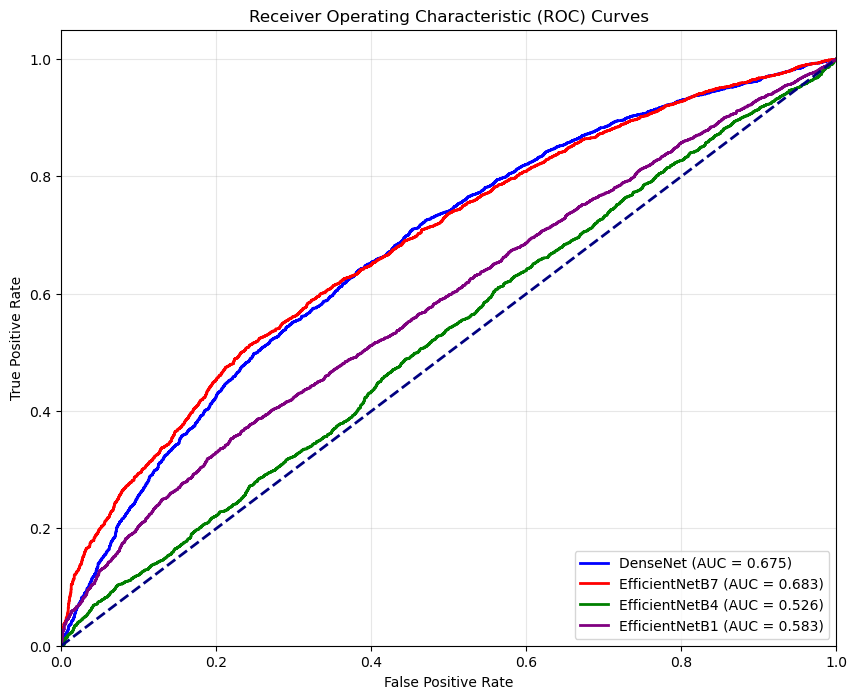


Optimal Threshold Analysis (Youden's J statistic):

DenseNet:
  Optimal threshold: 0.3693
  Sensitivity at optimal threshold: 0.7100
  Specificity at optimal threshold: 0.5469

EfficientNetB7:
  Optimal threshold: 0.6704
  Sensitivity at optimal threshold: 0.5127
  Specificity at optimal threshold: 0.7567

EfficientNetB4:
  Optimal threshold: 0.5874
  Sensitivity at optimal threshold: 0.6066
  Specificity at optimal threshold: 0.4404

EfficientNetB1:
  Optimal threshold: 0.5830
  Sensitivity at optimal threshold: 0.3520
  Specificity at optimal threshold: 0.7818


In [30]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get true labels
y_true = test_gen.classes

# Dictionary to store predictions
predictions = {}

# Get predictions for each model
for name, model in models.items():
    if isinstance(model, tuple):  # Handle the case where model is a tuple (model, generator)
        model_obj, generator = model
        predictions[name] = model_obj.predict(generator)
    else:
        predictions[name] = model.predict(test_gen)

# Calculate and plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange']
color_index = 0

for name, y_pred in predictions.items():
    # Ensure predictions are flattened if needed
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # Multi-class case
        y_pred = y_pred[:, 1]  # Take the probability of the positive class
    else:
        y_pred = y_pred.flatten()
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color=colors[color_index % len(colors)], lw=2, 
             label=f'{name} (AUC = {roc_auc:.3f})')
    color_index += 1

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Save the figure
plt.savefig('roc_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional analysis: Find optimal threshold using Youden's J statistic
print("\nOptimal Threshold Analysis (Youden's J statistic):")
for name, y_pred in predictions.items():
    # Ensure predictions are flattened
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # Multi-class case
        y_pred = y_pred[:, 1]  # Take the probability of the positive class
    else:
        y_pred = y_pred.flatten()
        
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    
    # Calculate Youden's J statistic
    j_scores = tpr - fpr
    best_idx = np.argmax(j_scores)
    best_threshold = thresholds[best_idx]
    
    print(f"\n{name}:")
    print(f"  Optimal threshold: {best_threshold:.4f}")
    print(f"  Sensitivity at optimal threshold: {tpr[best_idx]:.4f}")
    print(f"  Specificity at optimal threshold: {1-fpr[best_idx]:.4f}")